<a href="https://colab.research.google.com/github/ranjanguddu/Machine-Learning/blob/master/EVA4/Session-09/Assignment-09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

        
# **All Standard Import Function**






In [0]:
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-kbud7b1e
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-kbud7b1e
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=64514 sha256=46e3223d3844e62b3646458bd2a1abab3aea3258150f8d0d79155c925465fd3e
  Stored in directory: /tmp/pip-ephem-wheel-cache-u0zgf4gl/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.4.5
    Uninstalling albumentations-0.4.5:
      Successfully uninstalled albumentations-0.4.5


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os
os.chdir('/content/gdrive/My Drive/EVA4_Assignment/')

In [0]:
!ls -l

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from torch.utils.data import DataLoader, Dataset
# Import pytorch utilities from albumentations
import albumentations as A

import numpy as np
import pandas as pd
import seaborn as sn  # for heatmaps
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from Edited_ResNet import ResNet18
%matplotlib inline

# **Code to Transform the DATA**

In [0]:
from albumentations import (Compose, HorizontalFlip, Cutout, Rotate)
from PIL import Image
def strong_aug(p=0.5):
  return Compose([HorizontalFlip(),
                  Rotate(limit=(-30, 30)),
                  Cutout(num_holes=4)
                  ], p=p)
  
def augment(aug, image):
  return aug(image=image)['image']

class MyTransform(object):
  def __call__(self, img):
    aug = strong_aug(p=1)
    return Image.fromarray(augment(aug,  np.array(img)))

In [0]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                       MyTransform(),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
                                       ])

In [0]:
 #!pip install albumentations

#**Load the DATA (CIFAR-10)**

In [0]:
trainset = datasets.CIFAR10(root='./data', train=True,download=True, transform=train_transforms)
testset = datasets.CIFAR10(root='./data', train=False,download=True, transform=test_transforms)
                                          

Files already downloaded and verified
Files already downloaded and verified


# **Data Loader**

In [0]:
SEED = 101

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=False, batch_size=32, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)
small_loader = torch.utils.data.DataLoader(trainset, batch_size= 1)
# train dataloader
train_loader = torch.utils.data.DataLoader(trainset, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(testset, **dataloader_args)

CUDA Available? True


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f9d81f097f0>>
Traceback (most recent call last):
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f9d81f097f0>>
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f9d81f097f0>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
    self._shutdown_workers()
Traceback (most recent call last):
  File "/usr/lib

 frog truck truck  deer


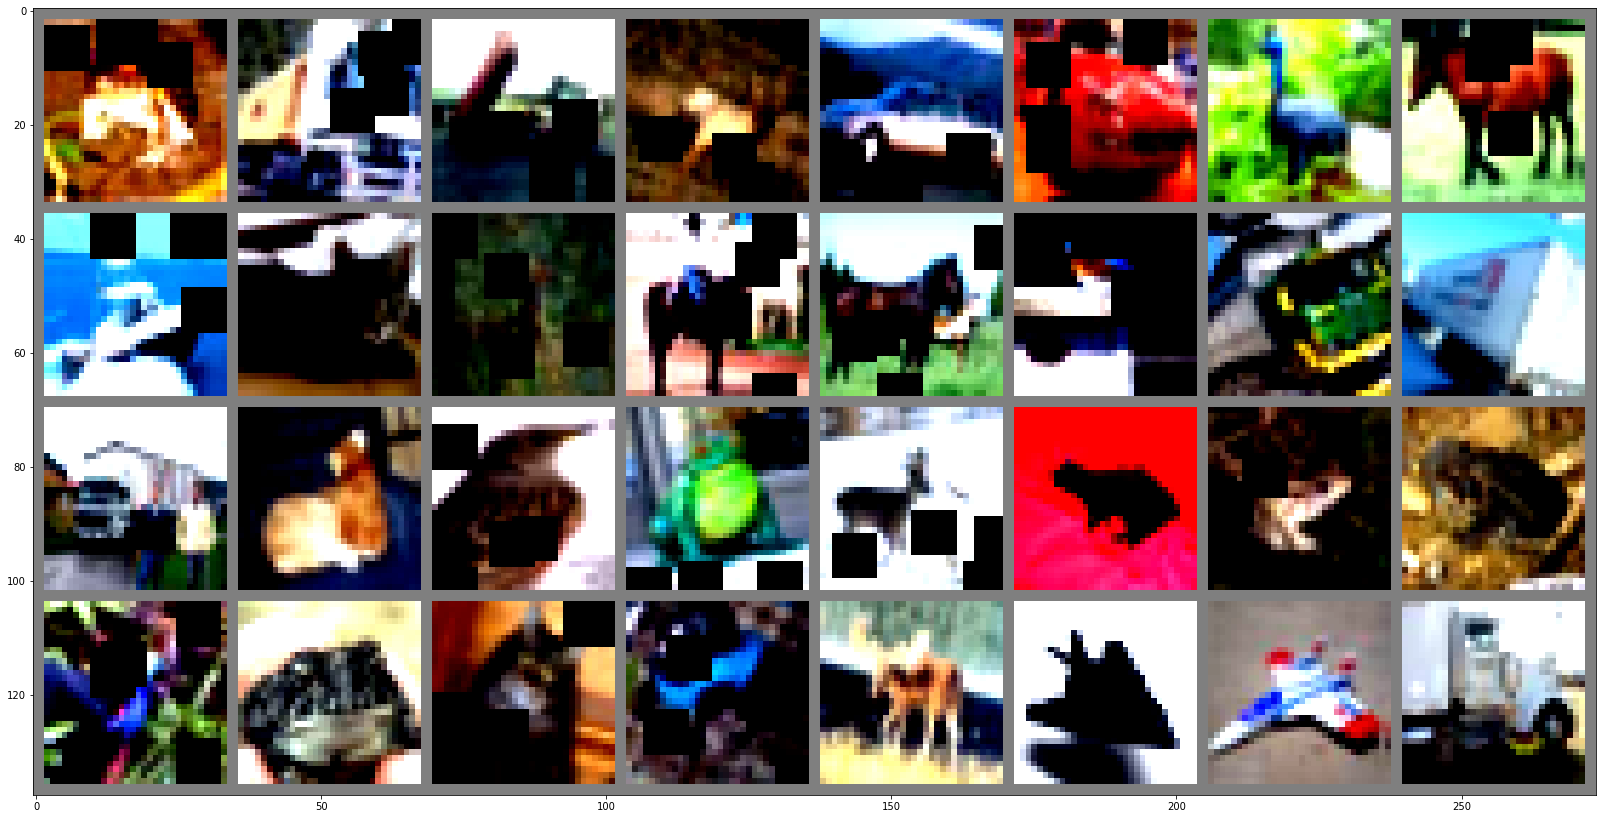

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision


# functions to show an image


def imshow(img):
    plt.figure(figsize=(28,15))
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

class_names = ['plane', '  car', ' bird', '  cat', ' deer', '  dog', ' frog', 'horse', ' ship', 'truck']

# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % class_names[labels[j]] for j in range(4)))

#**String Labels**

In [0]:
class_names = ['plane', '  car', ' bird', '  cat', ' deer', '  dog', ' frog', 'horse', ' ship', 'truck']


In [0]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
netobj = ResNet18()

model = netobj.to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [0]:
model =  netobj.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [0]:
from tqdm import tqdm
import torch
import torch.nn.functional as F
import time

train_losses = []
test_losses = []
train_acc = []
test_acc = []


def train(model, device, train_loader, optimizer, epoch):
  t0=time.time()
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  train_loss = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples and push the data and target to GPU
    data, target = data.to(device), target.to(device)

    # Set the gradient ZERO because it acculumates from previous conversion
    optimizer.zero_grad()
    # Predict
    y_pred = model(data)

    # Calculate loss
    #loss = F.nll_loss(y_pred, target)
    loss = criterion(y_pred, target)

    # Backpropagation
    loss.backward()
    optimizer.step()

    train_loss += loss

    # Update pbar-tqdm
    
    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    Training_Loss= train_loss/(batch_idx+1)
    
    pbar.set_description(desc= f'Loss={Training_Loss} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f} ')
    train_acc.append(100*correct/processed)


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(test_loader):
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            test_loss += loss.item()
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    #test_loss /= len(test_loader.dataset)
    Test_LOSS = test_loss/(batch_idx+1)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        Test_LOSS, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_acc.append(100. * correct / len(test_loader.dataset))

In [0]:


EPOCHS = 20


for epoch in range(EPOCHS):
    t0=time.time()
    print("\nEPOCH:", epoch+1)
    train(model, device, train_loader, optimizer, epoch)
    # scheduler.step()
    test(model, device, test_loader)
    t1= time.time()
    print("Time taken in epoch {} is {:.2f}\n".format(epoch+1, (t1-t0)))


  0%|          | 0/1563 [00:00<?, ?it/s]


EPOCH: 1


Loss=1.5639139413833618 Batch_id=1562 Accuracy=42.68 : 100%|██████████| 1563/1563 [00:49<00:00, 31.48it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 1.2625, Accuracy: 5378/10000 (53.78%)

Time taken in epoch 1 is 52.99


EPOCH: 2


Loss=1.1420265436172485 Batch_id=1562 Accuracy=59.19 : 100%|██████████| 1563/1563 [00:50<00:00, 31.09it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.8773, Accuracy: 6859/10000 (68.59%)

Time taken in epoch 2 is 53.68


EPOCH: 3


Loss=0.9389283061027527 Batch_id=1562 Accuracy=66.82 : 100%|██████████| 1563/1563 [00:50<00:00, 30.87it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.7408, Accuracy: 7429/10000 (74.29%)

Time taken in epoch 3 is 54.00


EPOCH: 4


Loss=0.7980740666389465 Batch_id=1562 Accuracy=72.03 : 100%|██████████| 1563/1563 [00:51<00:00, 30.59it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.6478, Accuracy: 7760/10000 (77.60%)

Time taken in epoch 4 is 54.55


EPOCH: 5


Loss=0.6948123574256897 Batch_id=1562 Accuracy=76.04 : 100%|██████████| 1563/1563 [00:51<00:00, 30.54it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.5492, Accuracy: 8155/10000 (81.55%)

Time taken in epoch 5 is 54.63


EPOCH: 6


Loss=0.6288653016090393 Batch_id=1562 Accuracy=78.17 : 100%|██████████| 1563/1563 [00:51<00:00, 30.63it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.4867, Accuracy: 8318/10000 (83.18%)

Time taken in epoch 6 is 54.46


EPOCH: 7


Loss=0.5643340945243835 Batch_id=1562 Accuracy=80.49 : 100%|██████████| 1563/1563 [00:51<00:00, 30.45it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.4667, Accuracy: 8408/10000 (84.08%)

Time taken in epoch 7 is 54.77


EPOCH: 8


Loss=0.513052225112915 Batch_id=1562 Accuracy=82.15 : 100%|██████████| 1563/1563 [00:51<00:00, 30.46it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.4340, Accuracy: 8548/10000 (85.48%)

Time taken in epoch 8 is 54.71


EPOCH: 9


Loss=0.47119200229644775 Batch_id=1562 Accuracy=83.41 : 100%|██████████| 1563/1563 [00:51<00:00, 30.51it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.4284, Accuracy: 8558/10000 (85.58%)

Time taken in epoch 9 is 54.61


EPOCH: 10


Loss=0.4347153902053833 Batch_id=1562 Accuracy=84.80 : 100%|██████████| 1563/1563 [00:51<00:00, 30.55it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.4119, Accuracy: 8602/10000 (86.02%)

Time taken in epoch 10 is 54.57


EPOCH: 11


Loss=0.40099748969078064 Batch_id=1562 Accuracy=85.96 : 100%|██████████| 1563/1563 [00:51<00:00, 30.48it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.3683, Accuracy: 8734/10000 (87.34%)

Time taken in epoch 11 is 54.73


EPOCH: 12


Loss=0.37011098861694336 Batch_id=1562 Accuracy=87.13 : 100%|██████████| 1563/1563 [00:50<00:00, 30.65it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.3901, Accuracy: 8703/10000 (87.03%)

Time taken in epoch 12 is 54.39


EPOCH: 13


Loss=0.35055917501449585 Batch_id=1562 Accuracy=87.78 : 100%|██████████| 1563/1563 [00:51<00:00, 30.46it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.3646, Accuracy: 8790/10000 (87.90%)

Time taken in epoch 13 is 54.78


EPOCH: 14


Loss=0.32313770055770874 Batch_id=1562 Accuracy=88.76 : 100%|██████████| 1563/1563 [00:51<00:00, 30.63it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.3568, Accuracy: 8830/10000 (88.30%)

Time taken in epoch 14 is 54.51


EPOCH: 15


Loss=0.3030890226364136 Batch_id=1562 Accuracy=89.41 : 100%|██████████| 1563/1563 [00:52<00:00, 29.61it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.3349, Accuracy: 8888/10000 (88.88%)

Time taken in epoch 15 is 56.38


EPOCH: 16


Loss=0.2824843227863312 Batch_id=1562 Accuracy=90.14 : 100%|██████████| 1563/1563 [00:55<00:00, 28.09it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.3630, Accuracy: 8868/10000 (88.68%)

Time taken in epoch 16 is 59.33


EPOCH: 17


Loss=0.2723793089389801 Batch_id=1562 Accuracy=90.48 : 100%|██████████| 1563/1563 [00:55<00:00, 28.41it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.3426, Accuracy: 8903/10000 (89.03%)

Time taken in epoch 17 is 58.64


EPOCH: 18


Loss=0.25254708528518677 Batch_id=1562 Accuracy=91.16 : 100%|██████████| 1563/1563 [00:54<00:00, 28.44it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.3444, Accuracy: 8895/10000 (88.95%)

Time taken in epoch 18 is 58.56


EPOCH: 19


Loss=0.2381603866815567 Batch_id=1562 Accuracy=91.71 : 100%|██████████| 1563/1563 [00:53<00:00, 29.44it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.3447, Accuracy: 8930/10000 (89.30%)

Time taken in epoch 19 is 56.59


EPOCH: 20


Loss=0.22886258363723755 Batch_id=1562 Accuracy=92.13 : 100%|██████████| 1563/1563 [00:51<00:00, 30.20it/s]



Test set: Average loss: 0.3490, Accuracy: 8905/10000 (89.05%)

Time taken in epoch 20 is 55.19



In [0]:
import io
import requests
from PIL import Image
from torchvision import models, transforms
from torch.autograd import Variable
from torch.nn import functional as F
import numpy as np
import cv2
import pdb

from google.colab.patches import cv2_imshow


# input image
LABELS_URL = 'https://s3.amazonaws.com/outcome-blog/imagenet/labels.json'
IMG_URL = 'http://media.mlive.com/news_impact/photo/9933031-large.jpg'

# networks such as googlenet, resnet, densenet already use global average pooling at the end, so CAM could be used directly.


    
net = model
finalconv_name = 'Conv2d-46'

#model.eval()
net.eval()
#netobj = ResNet18()

#model = netobj.to(device)

# hook the feature extractor
features_blobs = []
def hook_feature(module, input, output):
    features_blobs.append(output.data.cpu().numpy())

net._modules.get(finalconv_name).register_forward_hook(hook_feature)

# get the softmax weight
params = list(net.parameters())
weight_softmax = np.squeeze(params[-2].data.numpy())

def returnCAM(feature_conv, weight_softmax, class_idx):
    # generate the class activation maps upsample to 256x256
    size_upsample = (256, 256)
    bz, nc, h, w = feature_conv.shape
    output_cam = []
    for idx in class_idx:
        cam = weight_softmax[idx].dot(feature_conv.reshape((nc, h*w)))
        cam = cam.reshape(h, w)
        cam = cam - np.min(cam)
        cam_img = cam / np.max(cam)
        cam_img = np.uint8(255 * cam_img)
        output_cam.append(cv2.resize(cam_img, size_upsample))
    return output_cam


normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)
preprocess = transforms.Compose([
   transforms.Resize((32,32)),
   transforms.ToTensor(),
   normalize
])

response = requests.get(IMG_URL)
img_pil = Image.open(io.BytesIO(response.content))
img_pil.save('test.jpg')

img_tensor = preprocess(img_pil)
img_variable = Variable(img_tensor.unsqueeze(0))
logit = net(img_variable)

# download the imagenet category list
classes = {int(key):value for (key, value)
          in requests.get(LABELS_URL).json().items()}

h_x = F.softmax(logit, dim=1).data.squeeze()
probs, idx = h_x.sort(0, True)
probs = probs.numpy()
idx = idx.numpy()

# output the prediction
for i in range(0, 5):
    print('{:.3f} -> {}'.format(probs[i], classes[idx[i]]))

# generate class activation mapping for the top1 prediction
CAMs = returnCAM(features_blobs[0], weight_softmax, [idx[0]])

# render the CAM and output
print('output CAM.jpg for the top1 prediction: %s'%classes[idx[0]])
img = cv2.imread('test.jpg')
height, width, _ = img.shape
heatmap = cv2.applyColorMap(cv2.resize(CAMs[0],(width, height)), cv2.COLORMAP_JET)
result = heatmap * 0.3 + img * 0.5
cv2.imwrite('CAM.jpg', result)

cv2_imshow(img)
cv2_imshow(result)